In [3]:
#5-fold cross validation
# Run GBT classifier with cross-validation and plot ROC curves
import numpy as np
import pandas as pd
from functools import reduce

from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from scipy import interp 
from itertools import cycle

from sklearn.mixture import BayesianGaussianMixture
from sklearn.mixture import GaussianMixture

import matplotlib.pyplot as plt

In [4]:
#load data
lm = pd.read_csv("../data/celltype_10cells_fraction_LM_noUnk.csv", index_col=0)
zhong = pd.read_csv("../data/celltype_10cells_fraction_zhong.csv", index_col=0)

In [5]:
df_merged = [lm, zhong]
data = reduce(lambda left,right: pd.merge(left,right, left_index=True, right_index=True, how='inner'), df_merged)

In [6]:
autism_gene = pd.read_csv("../data/sfari_high_confidence_genes_08292019.csv", index_col=0)
control_gene = pd.read_csv("../data/control_genes_1911_iossifov.csv", index_col=0)

In [7]:
autism = data.loc[data.index.intersection(autism_gene['gene.symbol']),]
autism.shape

(88, 95)

In [8]:
control = data.loc[data.index.intersection(control_gene['GeneName']), ]
control.shape

(156, 95)

In [9]:
autism.index.intersection(control.index)

Index(['KDM5B', 'CACNA1H'], dtype='object')

In [10]:
control = control.drop(['CACNA1H', ])
control = control.drop(['KDM5B', ])
control.shape

(154, 95)

In [11]:
combine = [autism, control]
combine = pd.concat(combine)
combine.shape

(242, 95)

In [12]:
prelabel = np.array([1,0])
label = pd.DataFrame({'labels': np.repeat(prelabel, [autism.shape[0], control.shape[0]], axis = 0)})
label.shape

(242, 1)

In [13]:
index = np.random.permutation(label.index)
combine = combine.iloc[index]
label = label.iloc[index]

In [209]:
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers import Conv1D, MaxPooling2D, Flatten

# input dim must be 95
# simple neural network can match the supervised classifier
def build_keras_model_simple():
    model = Sequential()
    model.add(Dense(95, input_dim=95, activation='relu'))
    model.add(Dense(60, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(60, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(60, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    optimizer = keras.optimizers.Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

def build_keras_model_CNN():
    model = Sequential()
    model.add(Conv1D(64, (4), input_shape=(95, 1)))
#     model.add(MaxPooling2D(pool_size = 2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def build_keras_model_GAN():
    model = Sequential()
#     model.add(Dense(95, input_dim=95, activation='relu'))
    
    model.add(LSTM(64, input_shape=(193,95)))
#     add return sequences:
#     model.add(LSTM(64, return_sequences=True))
#     add dropout
#     model.add(LSTM(64, dropout=0.25, recurrent_dropout=0.25))
    model.add(Dense(64, activation="relu"))
    
#     Dropout?
#     model.add(Dropout(0.5))
    
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [210]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

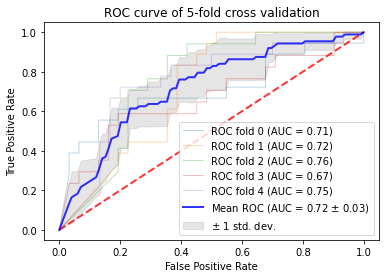

In [211]:
cv = StratifiedKFold(n_splits=5)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0

for train, test in cv.split(combine, label):
    # supervised params
    # Gradient Tree Boosting
#     params1 = {'n_estimators': 300,'learning_rate': 0.05, 'max_depth':1, 'random_state':1}
#     clf1 = GradientBoostingClassifier(**params).fit(combine.iloc[train], label.iloc[train])

#     # multi layer perceptron
#     params2 = {'solver': 'adam', 'alpha': 1e-5, 'hidden_layer_sizes':(100,), 'random_state': 1, 'max_iter': 500}
#     clf2 = MLPClassifier(**params).fit(combine.iloc[train], label.iloc[train])
    
#     # random forest classifier // pretty good // increasing n_estimators doesn't change anything, just run time
#     params3 = {"n_estimators": 300, "criterion": "entropy", "max_features":None, 'random_state': 1}
#     clf3 = RandomForestClassifier(**params).fit(combine.iloc[train], label.iloc[train])
    
#     # extra tree classifier // pretty good // increasing n_estimators doesn't change anything
#     params4 = {"n_estimators": 300, "criterion": "gini", "max_features":None, 'random_state': 1}
#     clf4 = ExtraTreesClassifier(**params).fit(combine.iloc[train], label.iloc[train])

#     # ADABOOST classifier // below average // increasing n_estimators doesn't change anything
#     params5 = {"n_estimators": 150, "algorithm":"SAMME.R", 'random_state': 1}
#     clf5 = AdaBoostClassifier(**params).fit(combine.iloc[train], label.iloc[train])
    
#     # k-neighbors classifier // pretty good // modifying these values don't do anything
#     params6 = {"n_neighbors": 20, "algorithm":"auto", "p":1, "leaf_size": 50, "weights":'uniform', 'random_state': 1}
#     clf6 = KNeighborsClassifier(**params).fit(combine.iloc[train], label.iloc[train])
    
#     # gaussian NB classifier // pretty good // modifying these values don't do anything
#     params7 = { 'random_state': 1}
#     clf7 = GaussianNB(**params).fit(combine.iloc[train], label.iloc[train])
    
#     # logistic regression // pretty good // modifying these values don't do anything
#     params8 = {'random_state': 1}
#     clf8 = LogisticRegression(**params).fit(combine.iloc[train], label.iloc[train])
    
#     voting classifier // pretty good // modifying these values don't do anything
#     ests = [('gtb', clf1), ('percep', clf2), ('rf', clf3), ('et', clf4), ('ab', clf5), ('knn', clf6)
#            , ('nb', clf7), ('lr', clf8)]
#     ws = [3, 1, 3, 3, 1, 1, 1, 1]
#     eclf = VotingClassifier(estimators=ests, voting='soft', weights=ws).fit(combine.iloc[train], label.iloc[train])
    
    # stacking classifier // pretty good // modifying these values don't do anything
#     ests = [('rf', clf3), ('et', clf4), ('ab', clf5), ('knn', clf6)
#            , ('nb', clf7), ('lr', clf8)]
#     eclf = StackingClassifier(estimators=ests, final_estimator = clf1).fit(combine.iloc[train], label.iloc[train])
    
    # regular GMM
#     params = {'n_components': 2, 'covariance_type': 'tied', 'random_state': 1, 'tol': 1e-4, 'max_iter': 1000, 
#              'init_params': 'kmeans'}
#     clf = GaussianMixture(**params).fit(combine.iloc[train], label.iloc[train])
    #print(combine.ix[test])
    
    # bayesian GMM
#     params = {'n_components': 2, 'covariance_type': 'tied', 'random_state': 3, 'tol': 1e-4, 'max_iter': 1000,
#              'init_params': 'kmeans', 'weight_concentration_prior_type': 'dirichlet_process',
#              'weight_concentration_prior': 0.9, 'mean_precision_prior': 0.8}
#     clf = BayesianGaussianMixture(**params).fit(combine.iloc[train], label.iloc[train])
    
#     probas_ = eclf.predict_proba(combine.iloc[test])
    
    # Keras NN Simple
    keras_model = build_keras_model_simple()
#     keras_model.fit(combine.iloc[train], label.iloc[train], epochs=5, batch_size=100, verbose=1)
    keras_model.fit(combine.iloc[train], label.iloc[train], epochs=1000, batch_size=20, verbose=0)
    
        # Keras CNN
#     print(combine.iloc[train].shape)
#     print(label.iloc[train].shape)
#     X_expand_dims = np.expand_dims(combine.iloc[train], axis = (2))
#     print(X_expand_dims.shape)
#     keras_model = build_keras_model_CNN()
# #     keras_model.fit(combine.iloc[train], label.iloc[train], epochs=5, batch_size=100, verbose=1)
#     keras_model.fit(X_expand_dims, label.iloc[train], epochs=100, batch_size=100, verbose=0)

    # Neural decision tree:
#     keras_model = create_tree_model()
    
#     X_test_expand_dims = np.expand_dims(combine.iloc[test], axis=(2))
#     probas_ = keras_model.predict(X_test_expand_dims)
    
    probas_ = keras_model.predict(combine.iloc[test])
#     print(probas_.shape)

    # Compute ROC curve and area the curve
    # not using neural net
#     fpr, tpr, thresholds = roc_curve(label.iloc[test], probas_[:,[1]])
    # using neural net
    fpr, tpr, thresholds = roc_curve(label.iloc[test], probas_)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of 5-fold cross validation')
plt.legend(loc="lower right")
plt.savefig('stack.png')
plt.show()
